In [1]:
 # Dependencies
import requests
import json
from config import api_key_open
from pprint import pprint
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
# Read the csv file for Co2 emission data
file_path = Path('Downloads/Resources/CO2_Emissions_by_Years.csv')
countries_co2_df = pd.read_csv(file_path)
countries_co2_df.head()

,Country,Code,Year,CO2 emission (Tons)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [3]:
# Read the csv file for GDP data
file_path1 = Path('Downloads/Resources/GDP_by_Years.csv')
countries_gdp_df = pd.read_csv(file_path1)
countries_gdp_df.head( )

,Country_Code,Region,Country,Year,Total_Gdp,Total_Gdp_Million
0,ABW,Americas,Aruba,1960,0.0,0.0
1,ABW,Americas,Aruba,1961,0.0,0.0
2,ABW,Americas,Aruba,1962,0.0,0.0
3,ABW,Americas,Aruba,1963,0.0,0.0
4,ABW,Americas,Aruba,1964,0.0,0.0


In [4]:
# Merge both the dataset for furter plotting
total_gdp = countries_gdp_df.loc[(countries_gdp_df["Year"]>=1980)&(countries_gdp_df["Year"]<2021),["Country","Year","Total_Gdp"]]
total_co2 = countries_co2_df.loc[(countries_co2_df["Year"]>=1980)&(countries_co2_df["Year"]<2021),["Country","Year","CO2 emission (Tons)"]]
scatter_df = pd.merge(total_gdp,total_co2,on=["Country","Year"],how="inner")
grouped_scatter_df = scatter_df.groupby("Country").mean()[["Total_Gdp","CO2 emission (Tons)"]]
grouped_scatter_df.head()

,Total_Gdp,CO2 emission (Tons)
Country,,
Afghanistan,6.721385e+09,4.294663e+06
Albania,6.216827e+09,4.808778e+06
Algeria,9.716979e+10,1.026144e+08
Andorra,1.932535e+09,3.666245e+05
Angola,3.719465e+10,1.403830e+07


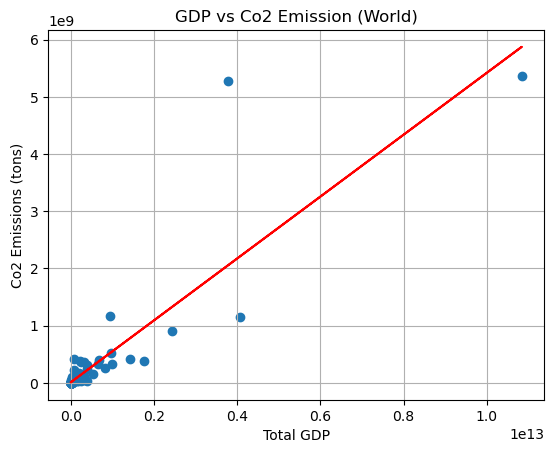

R value: 0.8804857693201334


In [5]:
# GDP vs Co2 Emission scatter plot and line
correlation = st.pearsonr(grouped_scatter_df["Total_Gdp"],grouped_scatter_df["CO2 emission (Tons)"])
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(grouped_scatter_df["Total_Gdp"],grouped_scatter_df["CO2 emission (Tons)"])
regress= grouped_scatter_df["Total_Gdp"] * slope + intercept
line_eq= f"y= {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(grouped_scatter_df["Total_Gdp"],grouped_scatter_df["CO2 emission (Tons)"])
plt.plot(grouped_scatter_df["Total_Gdp"],regress,"r-")
plt.xlabel("Total GDP")
plt.ylabel("Co2 Emissions (tons)")
plt.title("GDP vs Co2 Emission (World)")
plt.grid()
plt.savefig("GDPvsCo2_World.png")
plt.show()
print(f"R value: {rvalue}")

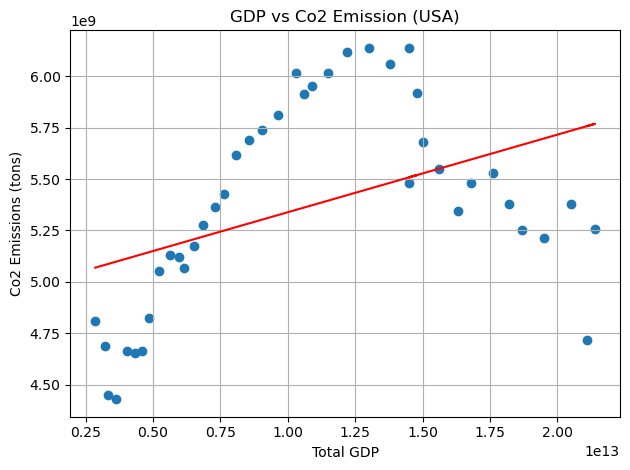

R value: 0.43126443534330894


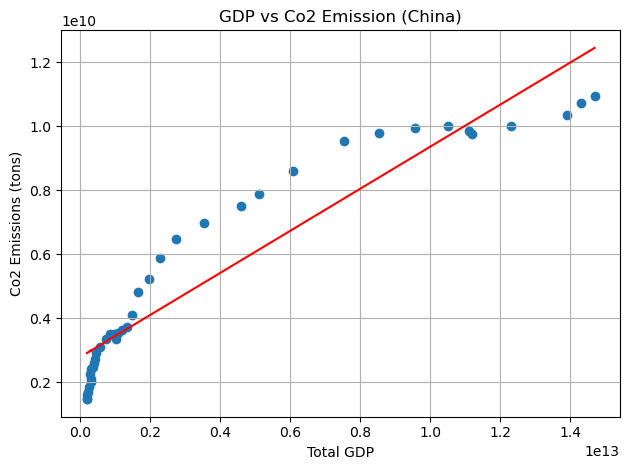

R value: 0.9436990097866762


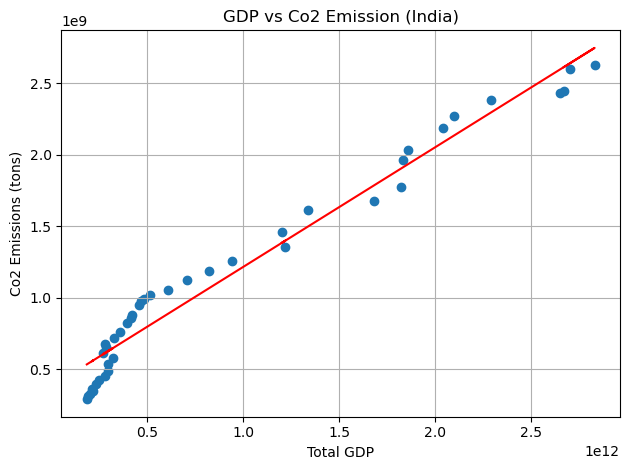

R value: 0.9804885809350435


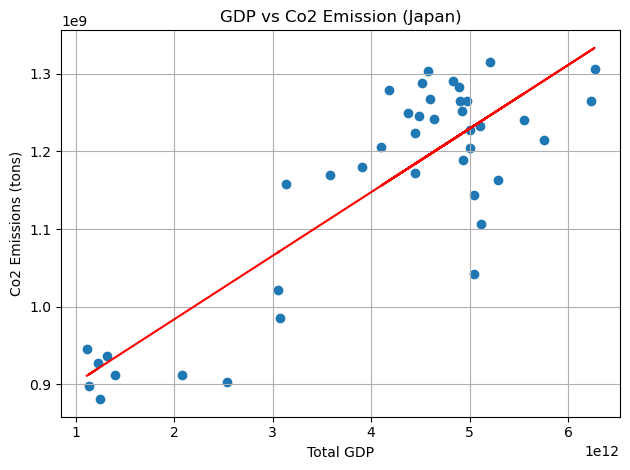

R value: 0.8605331228735146


In [6]:
# GDP vs Co2 Emission scatter plot for specific countries
correlation = st.pearsonr(scatter_df.loc[scatter_df["Country"]=="United States",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="United States",:]["CO2 emission (Tons)"])
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(scatter_df.loc[scatter_df["Country"]=="United States",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="United States",:]["CO2 emission (Tons)"])
regress= scatter_df.loc[scatter_df["Country"]=="United States",:]["Total_Gdp"] * slope + intercept
line_eq= f"y= {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(scatter_df.loc[scatter_df["Country"]=="United States",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="United States",:]["CO2 emission (Tons)"])
plt.plot(scatter_df.loc[scatter_df["Country"]=="United States",:]["Total_Gdp"],regress,color='red')
plt.xlabel("Total GDP")
plt.ylabel("Co2 Emissions (tons)")
plt.title("GDP vs Co2 Emission (USA)")
plt.tight_layout()
plt.grid()
plt.savefig("GDPvsCo2_USA.png")
plt.show()
print(f"R value: {rvalue}")

correlation = st.pearsonr(scatter_df.loc[scatter_df["Country"]=="China",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="China",:]["CO2 emission (Tons)"])
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(scatter_df.loc[scatter_df["Country"]=="China",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="China",:]["CO2 emission (Tons)"])
regress= scatter_df.loc[scatter_df["Country"]=="China",:]["Total_Gdp"] * slope + intercept
line_eq= f"y= {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(scatter_df.loc[scatter_df["Country"]=="China",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="China",:]["CO2 emission (Tons)"])
plt.plot(scatter_df.loc[scatter_df["Country"]=="China",:]["Total_Gdp"],regress,color='red')
plt.xlabel("Total GDP")
plt.ylabel("Co2 Emissions (tons)")
plt.title("GDP vs Co2 Emission (China)")
plt.tight_layout()
plt.grid()
plt.savefig("GDPvsCo2_China.png")
plt.show()
print(f"R value: {rvalue}")

correlation = st.pearsonr(scatter_df.loc[scatter_df["Country"]=="India",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="India",:]["CO2 emission (Tons)"])
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(scatter_df.loc[scatter_df["Country"]=="India",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="India",:]["CO2 emission (Tons)"])
regress= scatter_df.loc[scatter_df["Country"]=="India",:]["Total_Gdp"] * slope + intercept
line_eq= f"y= {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(scatter_df.loc[scatter_df["Country"]=="India",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="India",:]["CO2 emission (Tons)"])
plt.plot(scatter_df.loc[scatter_df["Country"]=="India",:]["Total_Gdp"],regress,color='red')
plt.xlabel("Total GDP")
plt.ylabel("Co2 Emissions (tons)")
plt.title("GDP vs Co2 Emission (India)")
plt.tight_layout()
plt.grid()
plt.savefig("GDPvsCo2_India.png")
plt.show()
print(f"R value: {rvalue}")

correlation = st.pearsonr(scatter_df.loc[scatter_df["Country"]=="Japan",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="Japan",:]["CO2 emission (Tons)"])
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(scatter_df.loc[scatter_df["Country"]=="Japan",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="Japan",:]["CO2 emission (Tons)"])
regress= scatter_df.loc[scatter_df["Country"]=="Japan",:]["Total_Gdp"] * slope + intercept
line_eq= f"y= {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(scatter_df.loc[scatter_df["Country"]=="Japan",:]["Total_Gdp"],scatter_df.loc[scatter_df["Country"]=="Japan",:]["CO2 emission (Tons)"])
plt.plot(scatter_df.loc[scatter_df["Country"]=="Japan",:]["Total_Gdp"],regress,color='red')
plt.xlabel("Total GDP")
plt.ylabel("Co2 Emissions (tons)")
plt.title("GDP vs Co2 Emission (Japan)")
plt.tight_layout()
plt.grid()
plt.savefig("GDPvsCo2_Japan.png")
plt.show()
print(f"R value: {rvalue}")

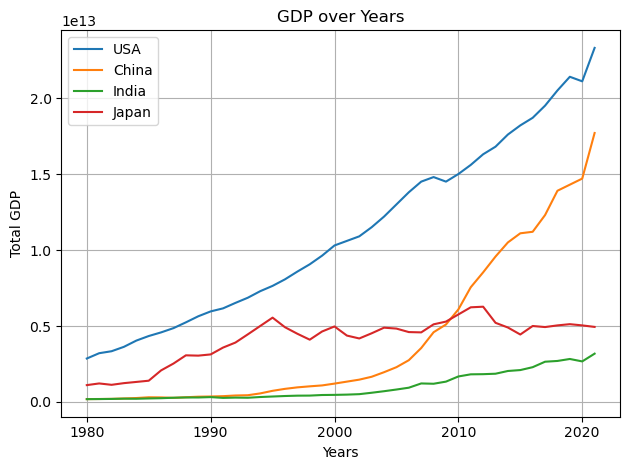

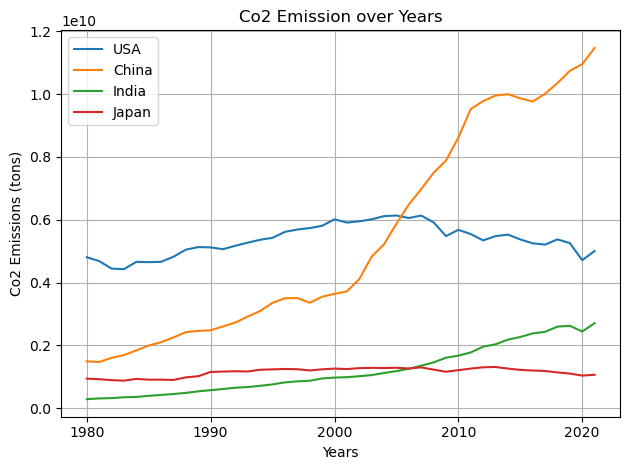

In [7]:
# Side by side analysis of GDP vs Co2 emissions on a line chart for few major countries
china_gdp_df=countries_gdp_df.loc[(countries_gdp_df["Country"]=="China") & (countries_gdp_df["Year"]>=1980),:]
india_gdp_df=countries_gdp_df.loc[(countries_gdp_df["Country"]=="India") & (countries_gdp_df["Year"]>=1980),:]
usa_gdp_df=countries_gdp_df.loc[(countries_gdp_df["Country"]=="United States") & (countries_gdp_df["Year"]>=1980),:]
germany_gdp_df=countries_gdp_df.loc[(countries_gdp_df["Country"]=="Japan") & (countries_gdp_df["Year"]>=1980),:]

plt.plot(usa_gdp_df["Year"],usa_gdp_df["Total_Gdp"],label="USA")
plt.plot(china_gdp_df["Year"],china_gdp_df["Total_Gdp"],label="China")
plt.plot(india_gdp_df["Year"],india_gdp_df["Total_Gdp"],label="India")
plt.plot(germany_gdp_df["Year"],germany_gdp_df["Total_Gdp"],label="Japan")
plt.xlabel("Years")
plt.ylabel("Total GDP")
plt.legend(loc="upper left")
plt.title("GDP over Years")
plt.tight_layout()
plt.grid()
plt.savefig("GDPoverYears.png")
plt.show()

china_co2_df=countries_co2_df.loc[(countries_co2_df["Country"]=="China") & (countries_co2_df["Year"]>=1980),:]
india_co2_df=countries_co2_df.loc[(countries_co2_df["Country"]=="India") & (countries_co2_df["Year"]>=1980),:]
usa_co2_df=countries_co2_df.loc[(countries_co2_df["Country"]=="United States") & (countries_co2_df["Year"]>=1980),:]
germany_co2_df=countries_co2_df.loc[(countries_co2_df["Country"]=="Japan") & (countries_co2_df["Year"]>=1980),:]

plt.plot(usa_co2_df["Year"],usa_co2_df["CO2 emission (Tons)"],label="USA")
plt.plot(china_co2_df["Year"],china_co2_df["CO2 emission (Tons)"],label="China")
plt.plot(india_co2_df["Year"],india_co2_df["CO2 emission (Tons)"],label="India")
plt.plot(germany_co2_df["Year"],germany_co2_df["CO2 emission (Tons)"],label="Japan")
plt.xlabel("Years")
plt.ylabel("Co2 Emissions (tons)")
plt.legend(loc="upper left")
plt.title("Co2 Emission over Years")
plt.tight_layout()
plt.grid()
plt.savefig("Co2overYears.png")
plt.show()